In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.56, 0.57, 0.53],
   [0.46, 0.58, 0.58],
   [0.44, 0.61, 0.45],
   [0.48, 0.59, 0.55],
   [0.56, 0.59, 0.42],
   [0.49, 0.58, 0.56],
   [0.49, 0.61, 0.39],
   [0.55, 0.61, 0.3],
   [0.57, 0.6, 0.41],
   [0.62, 0.59, 0.41],
   [0.68, 0.57, 0.51]],
  [[0.56, 0.57, 0.53],
   [0.46, 0.58, 0.58],
   [0.44, 0.61, 0.45],
   [0.48, 0.59, 0.55],
   [0.49, 0.58, 0.56],
   [0.49, 0.61, 0.39],
   [0.55, 0.61, 0.3],
   [0.54, 0.61, 0.36],
   [0.54, 0.59, 0.43],
   [0.6, 0.55, 0.53],
   [0.55, 0.58, 0.44],
   [0.59, 0.56, 0.48],
   [0.51, 0.6, 0.38],
   [0.47, 0.64, 0.41],
   [0.55, 0.59, 0.37],
   [0.46, 0.63, 0.43],
   [0.58, 0.58, 0.38],
   [0.51, 0.58, 0.47],
   [0.39, 0.66, 0.36],
   [0.54, 0.62, 0.32]],
  [[0.46, 0.58, 0.58],
   [0.44, 0.61, 0.45],
   [0.48, 0.59, 0.55],
   [0.49, 0.58, 0.56],
   [0.49, 0.61, 0.39],
   [0.55, 0.61, 0.3],
   [0.6, 0.55, 0.53],
   [0.59, 0.56, 0.48],
   [0.51, 0.58, 0.47],
   [0.39, 0.66, 0.36],
   [0.53, 0.58, 0.39],
   [0.58, 0.56, 0.5],
   [0.47

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.57
MIN of objective index 2: 0.3
AVG of objective index 0: 0.5363636363636364
AVG of objective index 1: 0.5909090909090909
AVG of objective index 2: 0.4645454545454546
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.39
MIN of objective index 1: 0.55
MIN of objective index 2: 0.3
AVG of objective index 0: 0.515
AVG of objective index 1: 0.597
AVG of objective index 2: 0.43600000000000005
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.38
MIN of objective index 1: 0.55
MIN of objective index 2: 0.3
AVG of objective index 0: 0.49142857142857144
AVG of objective index 1: 0.5966666666666667
AVG of objective index 2: 0.4519047619047619
--------------
For the run index run_0 and generation index 3:
MIN of objective index 0: 0.31
MIN of objective index 1: 0.55
MIN of objective index 2: 0.3
AVG of objecti

{'run_0': {0: {'min_obj1': 0.44,
   'min_obj2': 0.57,
   'min_obj3': 0.3,
   'avg_obj1': 0.5363636363636364,
   'avg_obj2': 0.5909090909090909,
   'avg_obj3': 0.4645454545454546},
  1: {'min_obj1': 0.39,
   'min_obj2': 0.55,
   'min_obj3': 0.3,
   'avg_obj1': 0.515,
   'avg_obj2': 0.597,
   'avg_obj3': 0.43600000000000005},
  2: {'min_obj1': 0.38,
   'min_obj2': 0.55,
   'min_obj3': 0.3,
   'avg_obj1': 0.49142857142857144,
   'avg_obj2': 0.5966666666666667,
   'avg_obj3': 0.4519047619047619},
  3: {'min_obj1': 0.31,
   'min_obj2': 0.55,
   'min_obj3': 0.3,
   'avg_obj1': 0.4743478260869565,
   'avg_obj2': 0.5965217391304348,
   'avg_obj3': 0.4265217391304348},
  4: {'min_obj1': 0.31,
   'min_obj2': 0.53,
   'min_obj3': 0.27,
   'avg_obj1': 0.445,
   'avg_obj2': 0.5872222222222222,
   'avg_obj3': 0.44777777777777783},
  5: {'min_obj1': 0.31,
   'min_obj2': 0.52,
   'min_obj3': 0.27,
   'avg_obj1': 0.43896551724137933,
   'avg_obj2': 0.5817241379310345,
   'avg_obj3': 0.4617241379310345}

{0: {'min_obj1': 0.44, 'min_obj2': 0.57, 'min_obj3': 0.3, 'avg_obj1': 0.5363636363636364, 'avg_obj2': 0.5909090909090909, 'avg_obj3': 0.4645454545454546}, 1: {'min_obj1': 0.39, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.515, 'avg_obj2': 0.597, 'avg_obj3': 0.43600000000000005}, 2: {'min_obj1': 0.38, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.49142857142857144, 'avg_obj2': 0.5966666666666667, 'avg_obj3': 0.4519047619047619}, 3: {'min_obj1': 0.31, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.4743478260869565, 'avg_obj2': 0.5965217391304348, 'avg_obj3': 0.4265217391304348}, 4: {'min_obj1': 0.31, 'min_obj2': 0.53, 'min_obj3': 0.27, 'avg_obj1': 0.445, 'avg_obj2': 0.5872222222222222, 'avg_obj3': 0.44777777777777783}, 5: {'min_obj1': 0.31, 'min_obj2': 0.52, 'min_obj3': 0.27, 'avg_obj1': 0.43896551724137933, 'avg_obj2': 0.5817241379310345, 'avg_obj3': 0.4617241379310345}, 6: {'min_obj1': 0.31, 'min_obj2': 0.52, 'min_obj3': 0.27, 'avg_obj1': 0.4415625, 'avg_obj2': 0.58125, 'avg_o

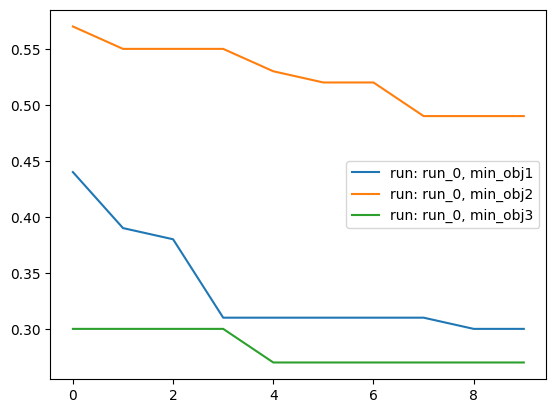

{0: {'min_obj1': 0.41, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.525, 'avg_obj2': 0.7716666666666666, 'avg_obj3': 0.25166666666666665}, 1: {'min_obj1': 0.41, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.48, 'avg_obj2': 0.762, 'avg_obj3': 0.21800000000000003}, 2: {'min_obj1': 0.39, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.43333333333333335, 'avg_obj2': 0.765, 'avg_obj3': 0.25333333333333335}, 3: {'min_obj1': 0.39, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.4511111111111112, 'avg_obj2': 0.7611111111111111, 'avg_obj3': 0.25666666666666665}, 4: {'min_obj1': 0.24, 'min_obj2': 0.74, 'min_obj3': 0.16, 'avg_obj1': 0.4058333333333333, 'avg_obj2': 0.7591666666666667, 'avg_obj3': 0.2575}, 5: {'min_obj1': 0.21, 'min_obj2': 0.74, 'min_obj3': 0.16, 'avg_obj1': 0.386, 'avg_obj2': 0.754, 'avg_obj3': 0.258}, 6: {'min_obj1': 0.21, 'min_obj2': 0.72, 'min_obj3': 0.16, 'avg_obj1': 0.378125, 'avg_obj2': 0.74625, 'avg_obj3': 0.291875}, 7: {'min_obj1': 0.21, 'min_obj2': 0.71, 'min

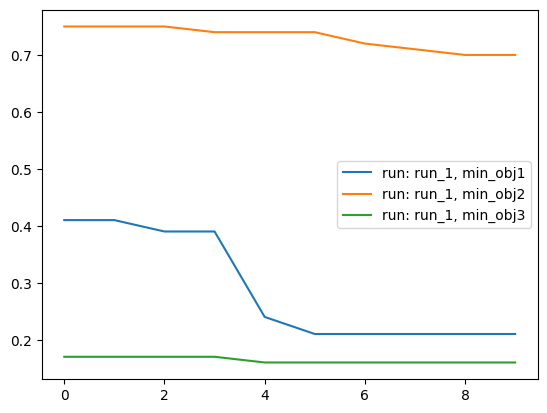

{0: {'min_obj1': 0.49, 'min_obj2': 0.8, 'min_obj3': 0.13, 'avg_obj1': 0.5225, 'avg_obj2': 0.8125, 'avg_obj3': 0.17}, 1: {'min_obj1': 0.49, 'min_obj2': 0.79, 'min_obj3': 0.13, 'avg_obj1': 0.522, 'avg_obj2': 0.808, 'avg_obj3': 0.20800000000000002}, 2: {'min_obj1': 0.42, 'min_obj2': 0.79, 'min_obj3': 0.12, 'avg_obj1': 0.5142857142857143, 'avg_obj2': 0.8071428571428572, 'avg_obj3': 0.14142857142857143}, 3: {'min_obj1': 0.4, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.48846153846153845, 'avg_obj2': 0.8084615384615385, 'avg_obj3': 0.1469230769230769}, 4: {'min_obj1': 0.35, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.47583333333333333, 'avg_obj2': 0.8058333333333333, 'avg_obj3': 0.14833333333333334}, 5: {'min_obj1': 0.35, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.468125, 'avg_obj2': 0.8, 'avg_obj3': 0.153125}, 6: {'min_obj1': 0.35, 'min_obj2': 0.76, 'min_obj3': 0.12, 'avg_obj1': 0.449375, 'avg_obj2': 0.795, 'avg_obj3': 0.15875}, 7: {'min_obj1': 0.33, 'min_obj2': 0.76, 'min

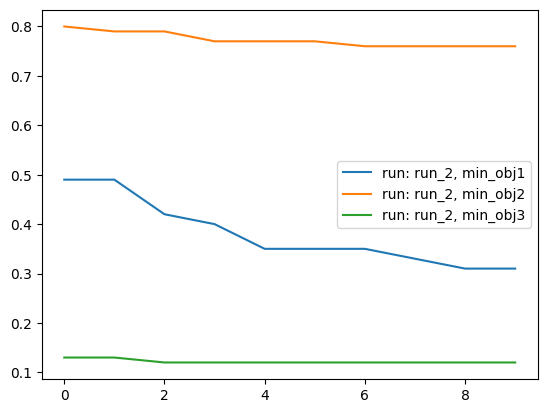

{0: {'min_obj1': 0.51, 'min_obj2': 0.83, 'min_obj3': 0.09, 'avg_obj1': 0.57, 'avg_obj2': 0.84, 'avg_obj3': 0.11333333333333334}, 1: {'min_obj1': 0.51, 'min_obj2': 0.82, 'min_obj3': 0.09, 'avg_obj1': 0.56375, 'avg_obj2': 0.835, 'avg_obj3': 0.11125}, 2: {'min_obj1': 0.5, 'min_obj2': 0.82, 'min_obj3': 0.09, 'avg_obj1': 0.5427272727272727, 'avg_obj2': 0.84, 'avg_obj3': 0.10545454545454545}, 3: {'min_obj1': 0.42, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.5327272727272727, 'avg_obj2': 0.8318181818181819, 'avg_obj3': 0.10636363636363635}, 4: {'min_obj1': 0.37, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.4766666666666667, 'avg_obj2': 0.8322222222222222, 'avg_obj3': 0.10666666666666666}, 5: {'min_obj1': 0.37, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.4709090909090909, 'avg_obj2': 0.8263636363636363, 'avg_obj3': 0.10909090909090909}, 6: {'min_obj1': 0.31, 'min_obj2': 0.8, 'min_obj3': 0.09, 'avg_obj1': 0.44, 'avg_obj2': 0.8218181818181818, 'avg_obj3': 0.11636363636363636}, 7

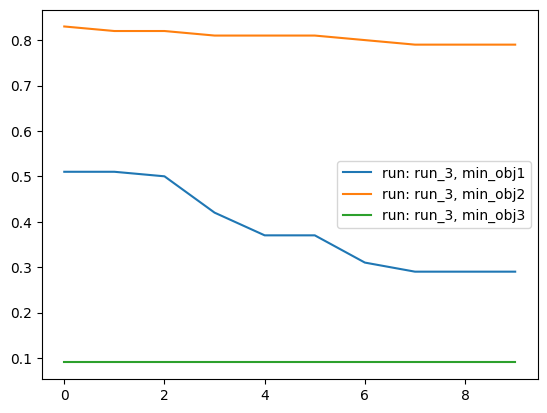

In [5]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.44, 'min_obj2': 0.57, 'min_obj3': 0.3, 'avg_obj1': 0.5363636363636364, 'avg_obj2': 0.5909090909090909, 'avg_obj3': 0.4645454545454546}, 1: {'min_obj1': 0.39, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.515, 'avg_obj2': 0.597, 'avg_obj3': 0.43600000000000005}, 2: {'min_obj1': 0.38, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.49142857142857144, 'avg_obj2': 0.5966666666666667, 'avg_obj3': 0.4519047619047619}, 3: {'min_obj1': 0.31, 'min_obj2': 0.55, 'min_obj3': 0.3, 'avg_obj1': 0.4743478260869565, 'avg_obj2': 0.5965217391304348, 'avg_obj3': 0.4265217391304348}, 4: {'min_obj1': 0.31, 'min_obj2': 0.53, 'min_obj3': 0.27, 'avg_obj1': 0.445, 'avg_obj2': 0.5872222222222222, 'avg_obj3': 0.44777777777777783}, 5: {'min_obj1': 0.31, 'min_obj2': 0.52, 'min_obj3': 0.27, 'avg_obj1': 0.43896551724137933, 'avg_obj2': 0.5817241379310345, 'avg_obj3': 0.4617241379310345}, 6: {'min_obj1': 0.31, 'min_obj2': 0.52, 'min_obj3': 0.27, 'avg_obj1': 0.4415625, 'avg_obj2': 0.58125, 'avg_o

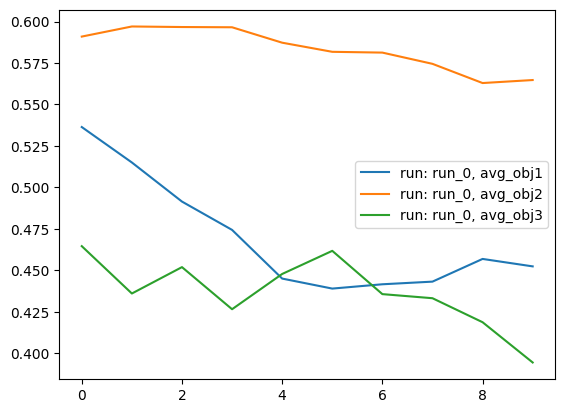

{0: {'min_obj1': 0.41, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.525, 'avg_obj2': 0.7716666666666666, 'avg_obj3': 0.25166666666666665}, 1: {'min_obj1': 0.41, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.48, 'avg_obj2': 0.762, 'avg_obj3': 0.21800000000000003}, 2: {'min_obj1': 0.39, 'min_obj2': 0.75, 'min_obj3': 0.17, 'avg_obj1': 0.43333333333333335, 'avg_obj2': 0.765, 'avg_obj3': 0.25333333333333335}, 3: {'min_obj1': 0.39, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.4511111111111112, 'avg_obj2': 0.7611111111111111, 'avg_obj3': 0.25666666666666665}, 4: {'min_obj1': 0.24, 'min_obj2': 0.74, 'min_obj3': 0.16, 'avg_obj1': 0.4058333333333333, 'avg_obj2': 0.7591666666666667, 'avg_obj3': 0.2575}, 5: {'min_obj1': 0.21, 'min_obj2': 0.74, 'min_obj3': 0.16, 'avg_obj1': 0.386, 'avg_obj2': 0.754, 'avg_obj3': 0.258}, 6: {'min_obj1': 0.21, 'min_obj2': 0.72, 'min_obj3': 0.16, 'avg_obj1': 0.378125, 'avg_obj2': 0.74625, 'avg_obj3': 0.291875}, 7: {'min_obj1': 0.21, 'min_obj2': 0.71, 'min

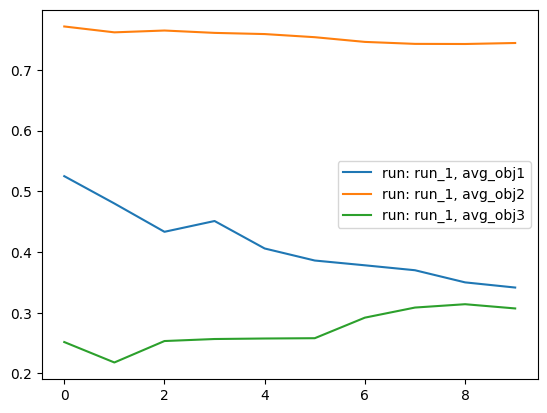

{0: {'min_obj1': 0.49, 'min_obj2': 0.8, 'min_obj3': 0.13, 'avg_obj1': 0.5225, 'avg_obj2': 0.8125, 'avg_obj3': 0.17}, 1: {'min_obj1': 0.49, 'min_obj2': 0.79, 'min_obj3': 0.13, 'avg_obj1': 0.522, 'avg_obj2': 0.808, 'avg_obj3': 0.20800000000000002}, 2: {'min_obj1': 0.42, 'min_obj2': 0.79, 'min_obj3': 0.12, 'avg_obj1': 0.5142857142857143, 'avg_obj2': 0.8071428571428572, 'avg_obj3': 0.14142857142857143}, 3: {'min_obj1': 0.4, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.48846153846153845, 'avg_obj2': 0.8084615384615385, 'avg_obj3': 0.1469230769230769}, 4: {'min_obj1': 0.35, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.47583333333333333, 'avg_obj2': 0.8058333333333333, 'avg_obj3': 0.14833333333333334}, 5: {'min_obj1': 0.35, 'min_obj2': 0.77, 'min_obj3': 0.12, 'avg_obj1': 0.468125, 'avg_obj2': 0.8, 'avg_obj3': 0.153125}, 6: {'min_obj1': 0.35, 'min_obj2': 0.76, 'min_obj3': 0.12, 'avg_obj1': 0.449375, 'avg_obj2': 0.795, 'avg_obj3': 0.15875}, 7: {'min_obj1': 0.33, 'min_obj2': 0.76, 'min

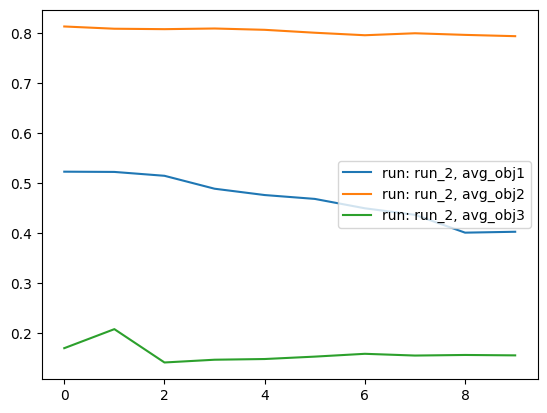

{0: {'min_obj1': 0.51, 'min_obj2': 0.83, 'min_obj3': 0.09, 'avg_obj1': 0.57, 'avg_obj2': 0.84, 'avg_obj3': 0.11333333333333334}, 1: {'min_obj1': 0.51, 'min_obj2': 0.82, 'min_obj3': 0.09, 'avg_obj1': 0.56375, 'avg_obj2': 0.835, 'avg_obj3': 0.11125}, 2: {'min_obj1': 0.5, 'min_obj2': 0.82, 'min_obj3': 0.09, 'avg_obj1': 0.5427272727272727, 'avg_obj2': 0.84, 'avg_obj3': 0.10545454545454545}, 3: {'min_obj1': 0.42, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.5327272727272727, 'avg_obj2': 0.8318181818181819, 'avg_obj3': 0.10636363636363635}, 4: {'min_obj1': 0.37, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.4766666666666667, 'avg_obj2': 0.8322222222222222, 'avg_obj3': 0.10666666666666666}, 5: {'min_obj1': 0.37, 'min_obj2': 0.81, 'min_obj3': 0.09, 'avg_obj1': 0.4709090909090909, 'avg_obj2': 0.8263636363636363, 'avg_obj3': 0.10909090909090909}, 6: {'min_obj1': 0.31, 'min_obj2': 0.8, 'min_obj3': 0.09, 'avg_obj1': 0.44, 'avg_obj2': 0.8218181818181818, 'avg_obj3': 0.11636363636363636}, 7

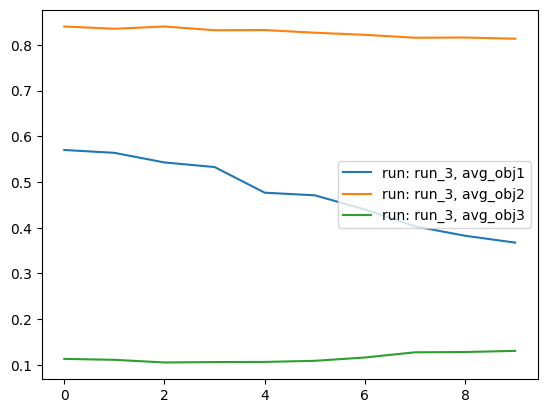

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)